In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import f_oneway


# Specify the delimiter as semicolon
redwine = pd.read_csv('winequality-red.csv', delimiter=';')
whitewine = pd.read_csv('winequality-white.csv', delimiter=';')
weather = pd.read_csv('Portugal_Weather_Data.csv', delimiter=';')
white_wine_score = pd.read_csv('White_Wine_Component_Scoring.csv', delimiter=';')
red_wine_score = pd.read_csv('Red_Wine_Component_Scoring.csv', delimiter=';')

# Display the first 5 rows
redwine.head(10)
#redwine.info
#redwine.columns
#redwine.dtypes
#redwine.isnull().sum()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
# # Check the first few rows of each dataset
# print(redwine.head())
# print(whitewine.head())
# print(weather.head())
# print(white_wine_score.head())
# print(red_wine_score.head())

# # Check data summaries and shapes
# print(redwine.info())
# print(whitewine.info())
# print(weather.info())
# print(white_wine_score.info())
# print(red_wine_score.info())

In [4]:
# count the occurrences of each unique 'quality' value
quality_counts = redwine['quality'].value_counts()
quality_counts

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [5]:
# filter rows where quality is 8
high_quality = redwine['quality'] == 8
redwine.loc[redwine['quality'] == 8]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8


In [6]:
# Select only numeric columns
numeric_columns = redwine.select_dtypes(include='number')

# Group by 'quality' and calculate the mean
mean_by_quality = numeric_columns.groupby(redwine['quality']== 8).mean()

print(mean_by_quality)

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
False         8.316825          0.529010     0.269608        2.538362   
True          8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
False     0.087683            15.904491             46.616066  0.996764   
True      0.068444            13.277778             33.444444  0.995212   

               pH  sulphates    alcohol   quality  
quality                                            
False    3.311613   0.656901  10.403953  5.609108  
True     3.267222   0.767778  12.094444  8.000000  


In [7]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
redwine['quality_label'] = redwine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into a categorical data type (specific to pandas) instead of a simple string
redwine['quality_label'] = pd.Categorical(redwine['quality_label'],
categories=['low', 'medium', 'high'])

redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [8]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
whitewine['quality_label'] = whitewine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into a categorical data type (specific to pandas) instead of a simple string
whitewine['quality_label'] = pd.Categorical(whitewine['quality_label'],
categories=['low', 'medium', 'high'])

whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


In [9]:
# Add a differentiating column
whitewine['wine_type'] = 'white'
redwine['wine_type'] = 'red'

# Combine the DataFrames
combined_wine = pd.concat([whitewine, redwine], ignore_index=True)

# Display the combined DataFrame
print(combined_wine.head())

# Save the combined DataFrame to a new CSV file if needed
combined_wine.to_csv('combined_wine.csv', index=False)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality quality_label wine_type  
0      8.8        6        medium     wh

In [10]:
stats = pd.concat([redwine.describe(), whitewine.describe()], axis=1, keys=["Red Wines Stats", "White Wines Stats"])
stats.round(2)

Red Wines Stats                                                        \
        fixed acidity volatile acidity citric acid residual sugar chlorides   
count         1599.00          1599.00     1599.00        1599.00   1599.00   
mean             8.32             0.53        0.27           2.54      0.09   
std              1.74             0.18        0.19           1.41      0.05   
min              4.60             0.12        0.00           0.90      0.01   
25%              7.10             0.39        0.09           1.90      0.07   
50%              7.90             0.52        0.26           2.20      0.08   
75%              9.20             0.64        0.42           2.60      0.09   
max             15.90             1.58        1.00          15.50      0.61   

                                                                            \
      free sulfur dioxide total sulfur dioxide  density       pH sulphates   
count             1599.00              1599.00  1599.00  1599.00   1599.00   
mean                15.87                46.47     1.00     3.31      0.66   
std                 10.46                32.90     0.00     0.15      0.17   
min                  1.00                 6.00     0.99     2.74      0.33   
25%                  7.00                22.00     1.00     3.21      0.55   
50%                 14.00                38.00     1.00     3.31      0.62   
75%                 21.00                62.00     1.00     3.40      0.73   
max                 72.00               289.00     1.00     4.01      2.00   

       ... White Wines Stats                                               \
       ...       citric acid residual sugar chlorides free sulfur dioxide   
count  ...           4898.00        4898.00   4898.00             4898.00   
mean   ...              0.33           6.39      0.05               35.31   
std    ...              0.12           5.07      0.02               17.01   
min    ...              0.00           0.60      0.01                2.00   
25%    ...              0.27           1.70      0.04               23.00   
50%    ...              0.32           5.20      0.04               34.00   
75%    ...              0.39           9.90      0.05               46.00   
max    ...              1.66          65.80      0.35              289.00   

                                                                          
      total sulfur dioxide  density       pH sulphates  alcohol  quality  
count              4898.00  4898.00  4898.00   4898.00  4898.00  4898.00  
mean                138.36     0.99     3.19      0.49    10.51     5.88  
std                  42.50     0.00     0.15      0.11     1.23     0.89  
min                   9.00     0.99     2.72      0.22     8.00     3.00  
25%                 108.00     0.99     3.09      0.41     9.50     5.00  
50%                 134.00     0.99     3.18      0.47    10.40     6.00  
75%                 167.00     1.00     3.28      0.55    11.40     6.00  
max                 440.00     1.04     3.82      1.08    14.20     9.00  

[8 rows x 24 columns]

In [11]:
redwine.describe()
redwine.round(2)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5,low,red
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.00,3.20,0.68,9.8,5,low,red
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.00,3.26,0.65,9.8,5,low,red
3,11.2,0.28,0.56,1.9,0.08,17.0,60.0,1.00,3.16,0.58,9.8,6,medium,red
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5,low,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.99,3.45,0.58,10.5,5,low,red
1595,5.9,0.55,0.10,2.2,0.06,39.0,51.0,1.00,3.52,0.76,11.2,6,medium,red
1596,6.3,0.51,0.13,2.3,0.08,29.0,40.0,1.00,3.42,0.75,11.0,6,medium,red
1597,5.9,0.64,0.12,2.0,0.08,32.0,44.0,1.00,3.57,0.71,10.2,5,low,red


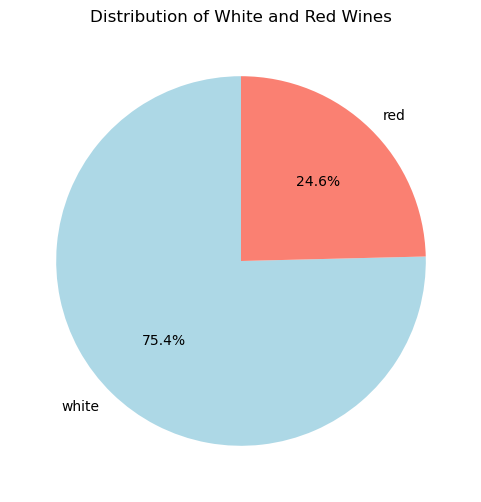

In [12]:
# Count the occurrences of each wine type
wine_counts = combined_wine['wine_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(
    wine_counts, 
    labels=wine_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightblue', 'salmon']
)
plt.title('Distribution of White and Red Wines')
plt.show()

In [13]:
combined_wine.isnull().sum()
combined_wine.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
6487,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5,low,red
6488,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6,medium,red
6489,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,medium,red
6490,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium,red
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,medium,red
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low,red
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,medium,red


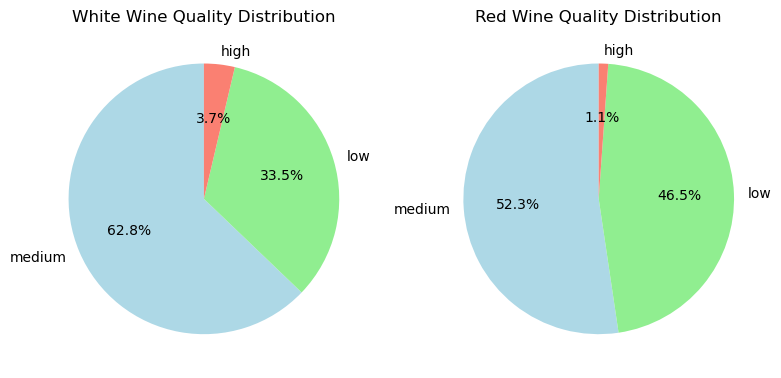

In [14]:
# Separate the data for White and Red wines
white_quality_counts = combined_wine[combined_wine['wine_type'] == 'white']['quality_label'].value_counts()
red_quality_counts = combined_wine[combined_wine['wine_type'] == 'red']['quality_label'].value_counts()

# Create a pie chart for White wines
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.pie(
    white_quality_counts, 
    labels=white_quality_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightblue', 'lightgreen', 'salmon']
)
plt.title('White Wine Quality Distribution')

# Create a pie chart for Red wines
plt.subplot(1, 2, 2)
plt.pie(
    red_quality_counts, 
    labels=red_quality_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightblue', 'lightgreen', 'salmon']
)
plt.title('Red Wine Quality Distribution')

# Display the plots
plt.tight_layout()
plt.show()

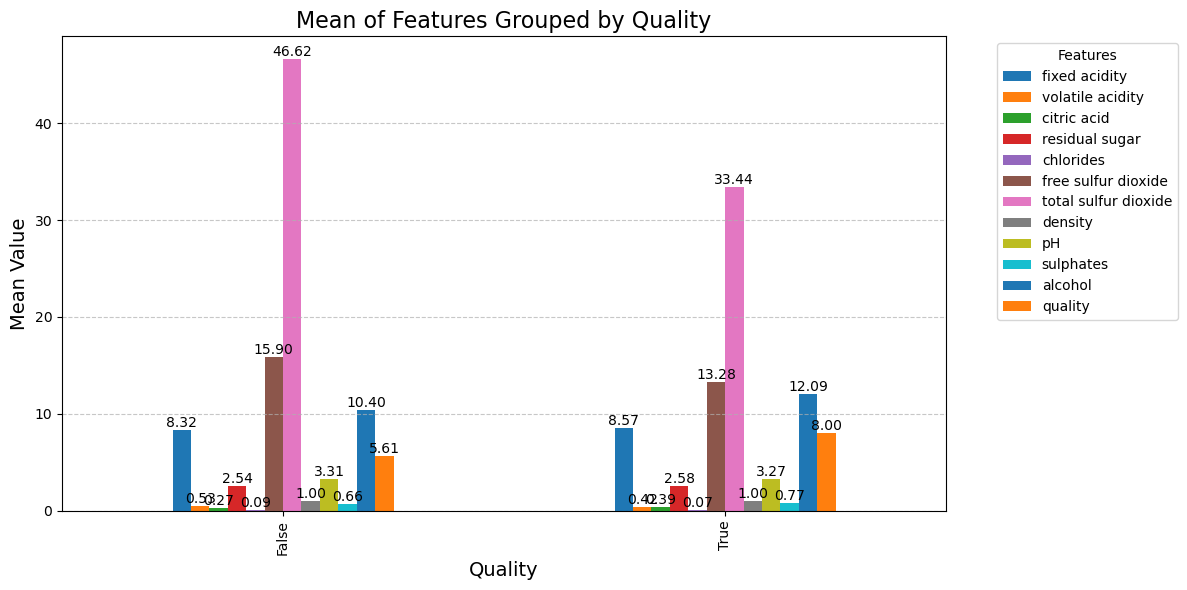

In [15]:
# Plot mean of all columns for each quality level
ax = mean_by_quality.plot(kind='bar', figsize=(12, 6))

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

# Add title and labels
plt.title('Mean of Features Grouped by Quality', fontsize=16)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

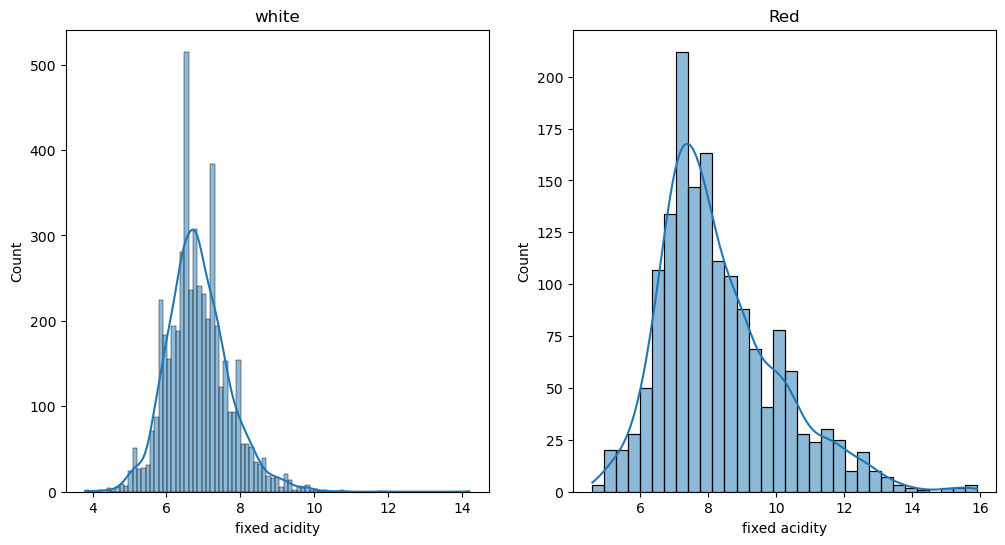

In [16]:
# Create two histograms using Seaborn's histplot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=whitewine, x='fixed acidity', ax=axs[0], kde=True)
sns.histplot(data=redwine, x='fixed acidity', ax=axs[1], kde=True)

# Customize plot as needed (e.g., titles, labels, colors)
axs[0].set_title('white')
axs[1].set_title('Red')

plt.show()

<Axes: xlabel='fixed acidity', ylabel='Count'>

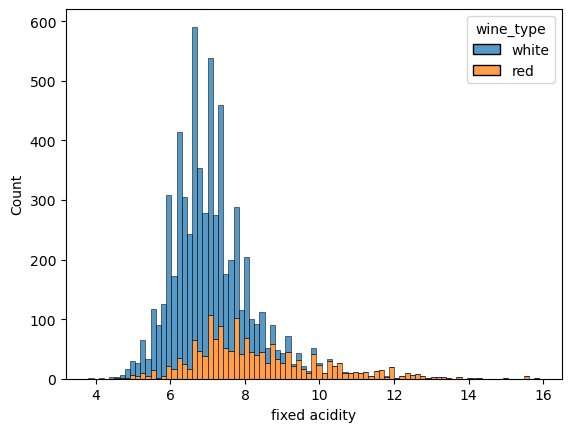

In [17]:
sns.histplot(data=combined_wine, x="fixed acidity", hue="wine_type", multiple="stack")

In [18]:
# Describe fixed_acidity for White wine
white_acidity_stats = combined_wine[combined_wine['wine_type'] == 'white']['fixed acidity'].describe()
print("Descriptive Statistics for White Wine Fixed Acidity:")
print(white_acidity_stats)

# Describe fixed_acidity for Red wine
red_acidity_stats = combined_wine[combined_wine['wine_type'] == 'red']['fixed acidity'].describe()
print(red_acidity_stats)

Descriptive Statistics for White Wine Fixed Acidity:
count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000
Name: fixed acidity, dtype: float64
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64


<Axes: ylabel='fixed acidity'>

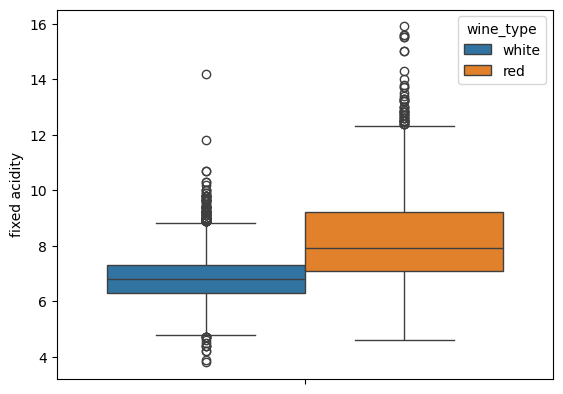

In [19]:
sns.boxplot(data=combined_wine, y="fixed acidity", hue="wine_type")

In [20]:
numeric_cols = combined_wine.select_dtypes(include=[np.number]).columns
mean_all_cols = combined_wine[numeric_cols].mean()
mean_all_cols


fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

In [21]:
# Group by 'wine_type' and 'quality_label' and calculate the mean for fixed_acidity
fixed_acidity_grouped = combined_wine.groupby(['wine_type', 'quality_label'])['fixed acidity'].mean()

# Display the grouped fixed_acidity
print(fixed_acidity_grouped)

wine_type  quality_label
red        low              8.142204
           medium           8.472043
           high             8.566667
white      low              6.961524
           medium           6.808236
           high             6.678333
Name: fixed acidity, dtype: float64


/var/folders/ms/kffv8scn23l62n_5h2kgw9sw0000gn/T/ipykernel_56417/44414136.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fixed_acidity_grouped = combined_wine.groupby(['wine_type', 'quality_label'])['fixed acidity'].mean()


Text(0.5, 1.0, 'Red Wine High-Quality Correlation')

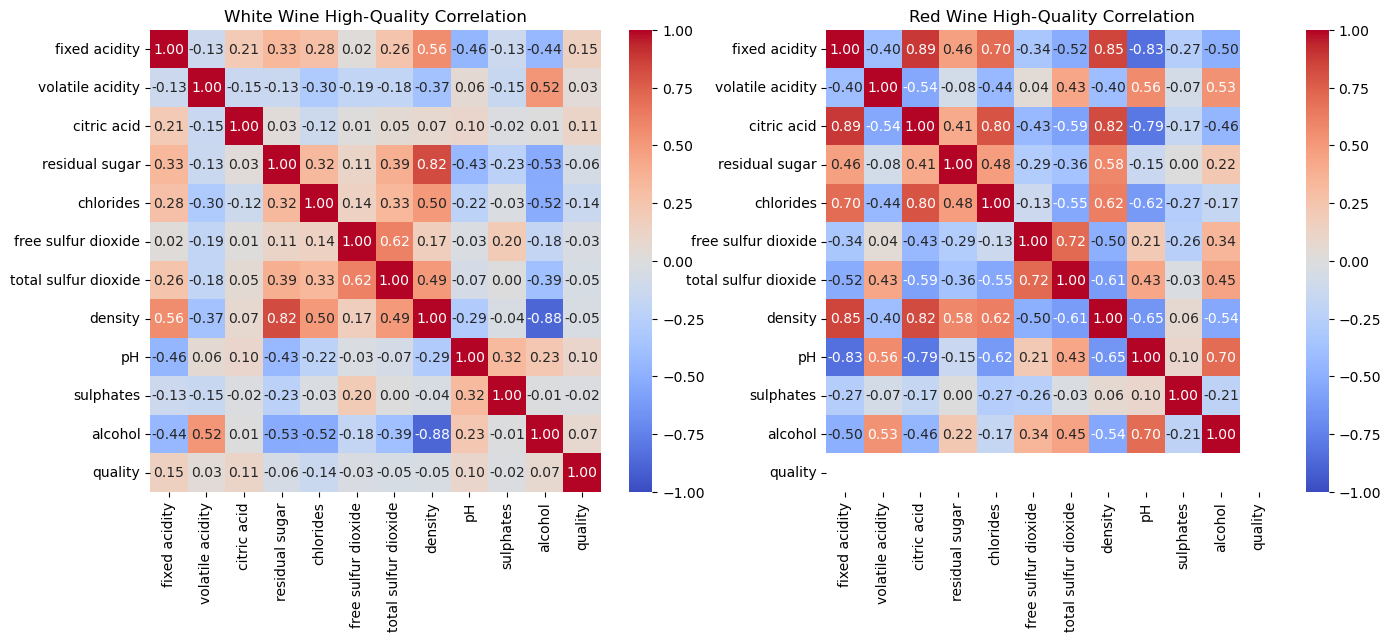

In [22]:
# Select only numeric columns
numeric_cols = whitewine.select_dtypes(include=['float64', 'int64'])
numeric_cols = redwine.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for high-quality wines
high_quality_data_white = whitewine[whitewine['quality_label'] == 'high']
high_quality_data_red = redwine[redwine['quality_label'] == 'high']
correlation_matrix_white = high_quality_data_white[numeric_cols.columns].corr()
correlation_matrix_red = high_quality_data_red[numeric_cols.columns].corr()

# Plot the heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap for White Wine
sns.heatmap(correlation_matrix_white, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("White Wine High-Quality Correlation")

# Heatmap for Red Wine
sns.heatmap(correlation_matrix_red, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Red Wine High-Quality Correlation")

<Axes: >

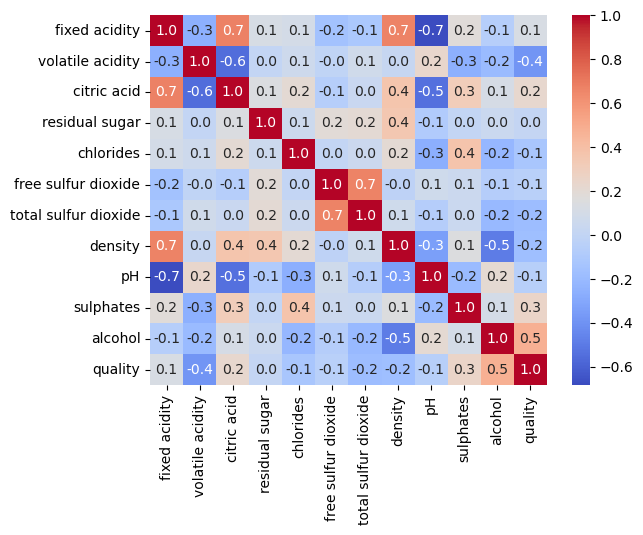

In [23]:
# Select only numeric columns
numeric_cols = redwine.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix,annot=True,fmt=".1f",cmap='coolwarm')

<Axes: >

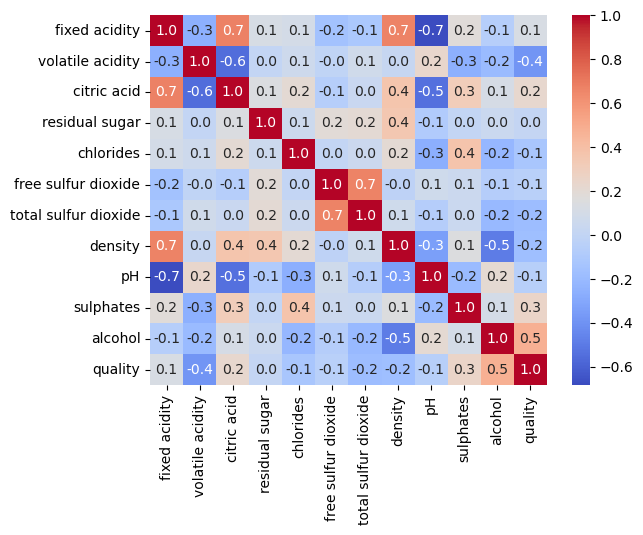

In [24]:
# Select only numeric columns
numeric_cols = redwine.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for high-quality wines
high_quality_data_red = redwine[redwine['quality_label'] == 'high']
correlation_matrix_red = high_quality_data_red[numeric_cols.columns].corr()

sns.heatmap(corr_matrix,annot=True,fmt=".1f",cmap='coolwarm')

<Axes: xlabel='fixed acidity', ylabel='density'>

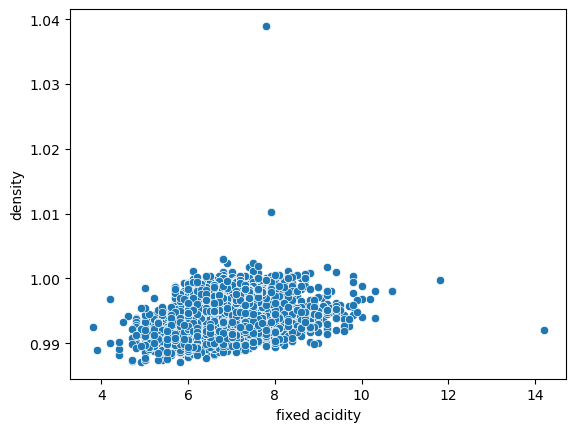

In [25]:
data=whitewine
sns.scatterplot(data=whitewine, x="fixed acidity", y="density")

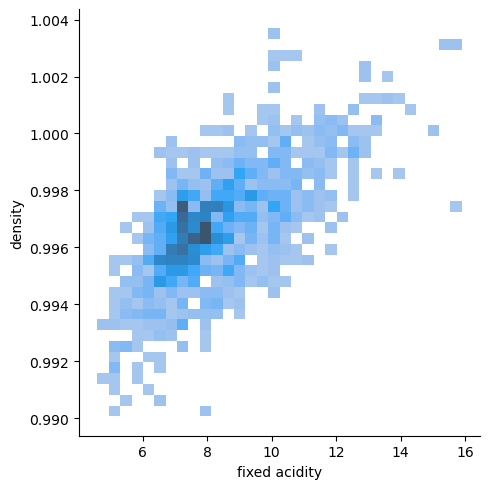

In [26]:
sns.displot(data=redwine, x="fixed acidity", y="density")

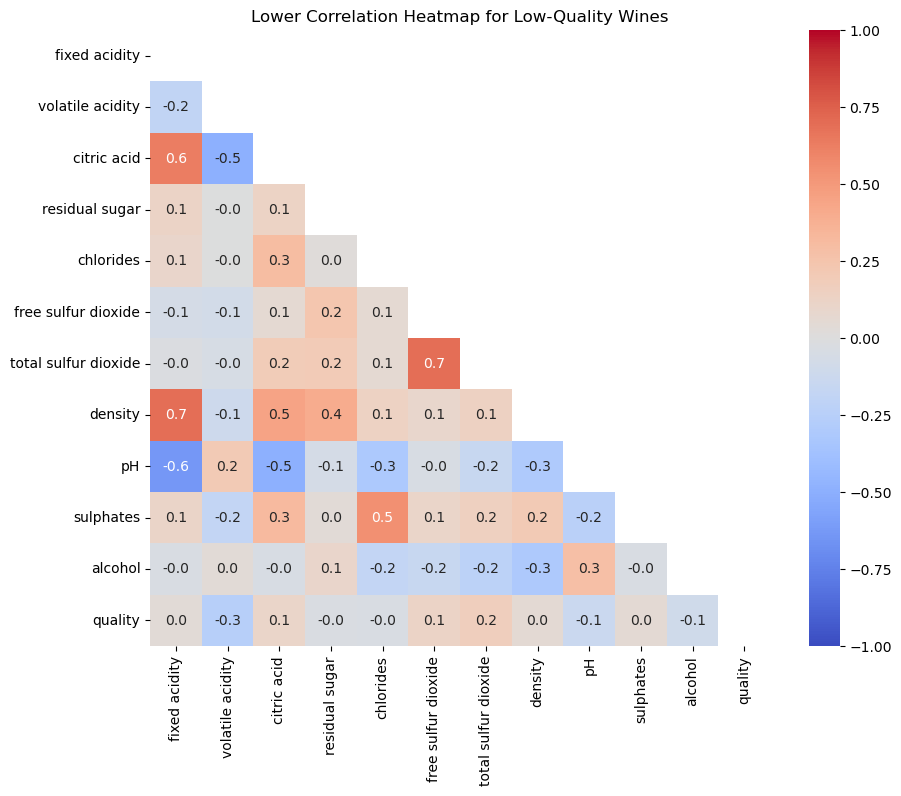

In [27]:
# Select only numeric columns
numeric_cols = redwine.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for low-quality wines
low_quality_data_red = redwine[redwine['quality_label'] == 'low']
correlation_matrix_red_low = low_quality_data_red[numeric_cols.columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_red_low, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(
    correlation_matrix_red_low,
    mask=mask,               # Apply the mask to hide the upper triangle
    annot=True,              # Display correlation values
    fmt=".1f",               # Format for annotations
    cmap='coolwarm',         # Color map
    vmin=-1, vmax=1          # Ensure consistent color scale for correlations
)
plt.title("Lower Correlation Heatmap for Low-Quality Wines")
plt.show()

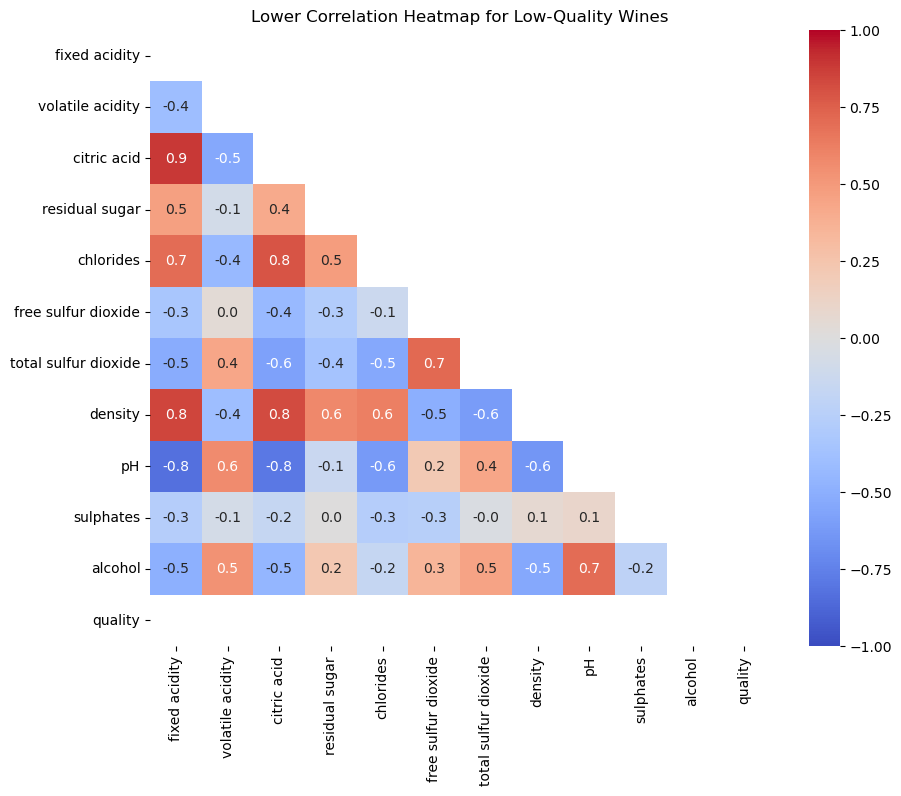

In [28]:
# Select only numeric columns
numeric_cols = redwine.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for low-quality wines
high_quality_data_red = redwine[redwine['quality_label'] == 'high']
correlation_matrix_red_high = high_quality_data_red[numeric_cols.columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_red_high, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(
    correlation_matrix_red_high,
    mask=mask,               # Apply the mask to hide the upper triangle
    annot=True,              # Display correlation values
    fmt=".1f",               # Format for annotations
    cmap='coolwarm',         # Color map
    vmin=-1, vmax=1          # Ensure consistent color scale for correlations
)
plt.title("Lower Correlation Heatmap for Low-Quality Wines")
plt.show()

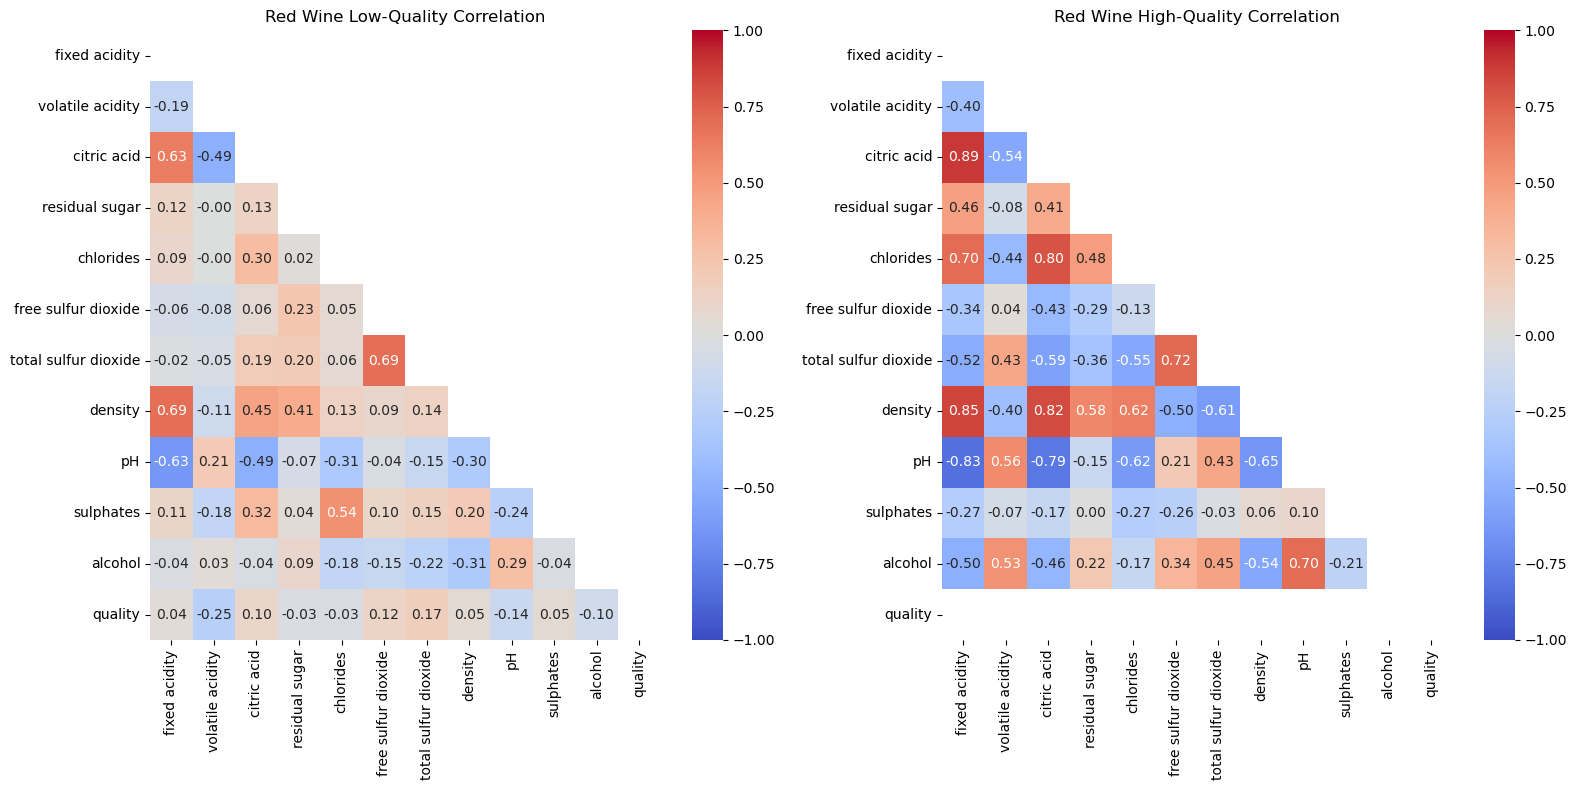

In [29]:
# Select only numeric columns
numeric_cols = redwine.select_dtypes(include=['float64', 'int64'])

# Filter data for high and low-quality wines
high_quality_data_red = redwine[redwine['quality_label'] == 'high']
low_quality_data_red = redwine[redwine['quality_label'] == 'low']

# Calculate correlation matrices
correlation_matrix_red_high = high_quality_data_red[numeric_cols.columns].corr()
correlation_matrix_red_low = low_quality_data_red[numeric_cols.columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_red_high, dtype=bool))

# Plot the heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Heatmap for Red Wine Low-Quality (masked upper triangle)
sns.heatmap(
    correlation_matrix_red_low,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1, vmax=1,
    ax=axes[0]
)
axes[0].set_title("Red Wine Low-Quality Correlation")

# Heatmap for Red Wine High-Quality (masked upper triangle)
sns.heatmap(
    correlation_matrix_red_high,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1, vmax=1,
    ax=axes[1]
)
axes[1].set_title("Red Wine High-Quality Correlation")

# Adjust layout
plt.tight_layout()
plt.show()

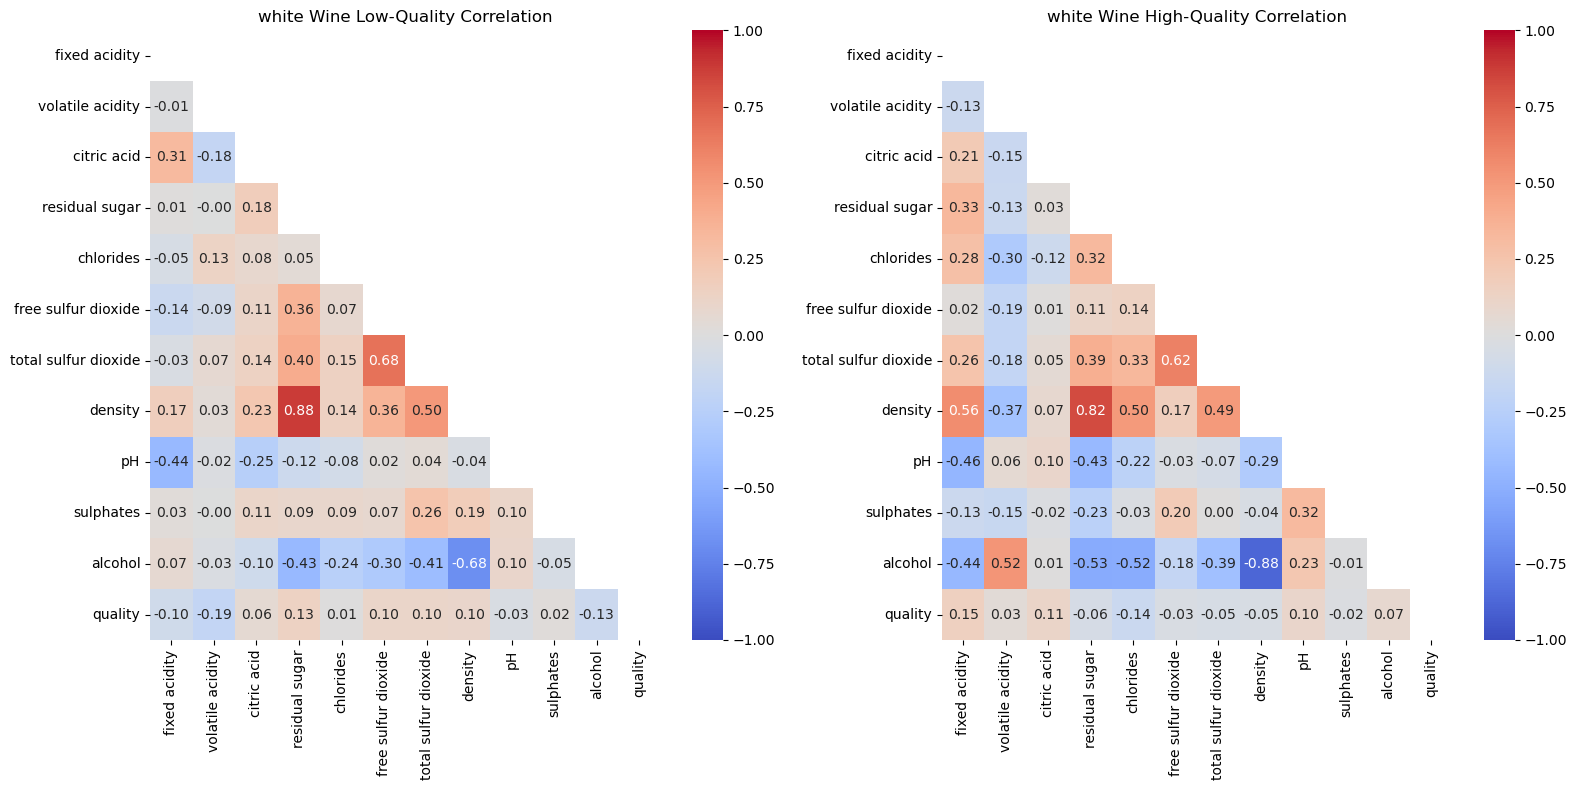

In [30]:
# Select only numeric columns
numeric_cols_white = whitewine.select_dtypes(include=['float64', 'int64'])

# Filter data for high and low-quality wines
high_quality_data_white = whitewine[whitewine['quality_label'] == 'high']
low_quality_data_white = whitewine[whitewine['quality_label'] == 'low']    

# Calculate correlation matrices
correlation_matrix_white_high = high_quality_data_white[numeric_cols_white.columns].corr()
correlation_matrix_white_low = low_quality_data_white[numeric_cols_white.columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_white_high, dtype=bool))

# Plot the heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Heatmap for Red Wine Low-Quality (masked upper triangle)
sns.heatmap(
    correlation_matrix_white_low,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1, vmax=1,
    ax=axes[0]
)
axes[0].set_title("white Wine Low-Quality Correlation")

# Heatmap for Red Wine High-Quality (masked upper triangle)
sns.heatmap(
    correlation_matrix_white_high,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1, vmax=1,
    ax=axes[1]
)
axes[1].set_title("white Wine High-Quality Correlation")

# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
correlation_matrix_red_high = high_quality_data_red_high[numeric_cols.columns].corr()
positive_corr = correlation_matrix_red_high[correlation_matrix_red_high > 0]
positive_corr.round(2)

NameError: name 'high_quality_data_red_high' is not defined

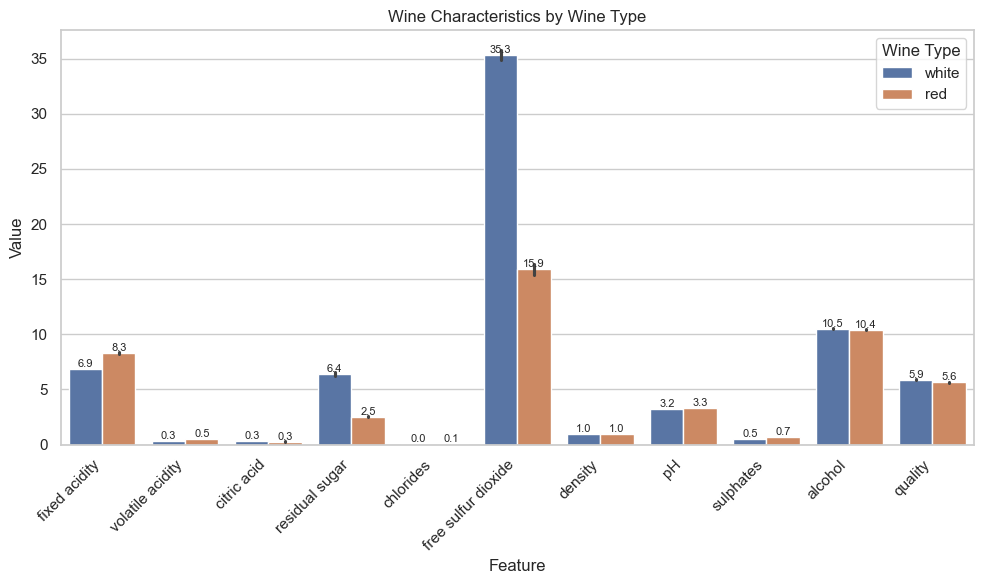

In [ ]:
# Step 2: Filter numeric columns and keep 'wine_type'
numeric_data = combined_wine.select_dtypes(include=['number'])  # Select only numeric columns

# Retain the 'wine_type' column
if 'wine_type' in combined_wine.columns:
    numeric_data['wine_type'] = combined_wine['wine_type']

# Melt the data
melted_wine = numeric_data.melt(id_vars=['wine_type'], var_name='Feature', value_name='Value')

# Exclude 'total sulfur dioxide' from the melted data
melted_wine = melted_wine[melted_wine['Feature'] != 'total sulfur dioxide']

# Plot the melted data
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted_wine, x='Feature', y='Value', hue='wine_type')

# Show values on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8)

plt.title('Wine Characteristics by Wine Type')
plt.xlabel('Feature')
plt.ylabel('Value')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.legend(title='Wine Type')
plt.tight_layout()
plt.show()

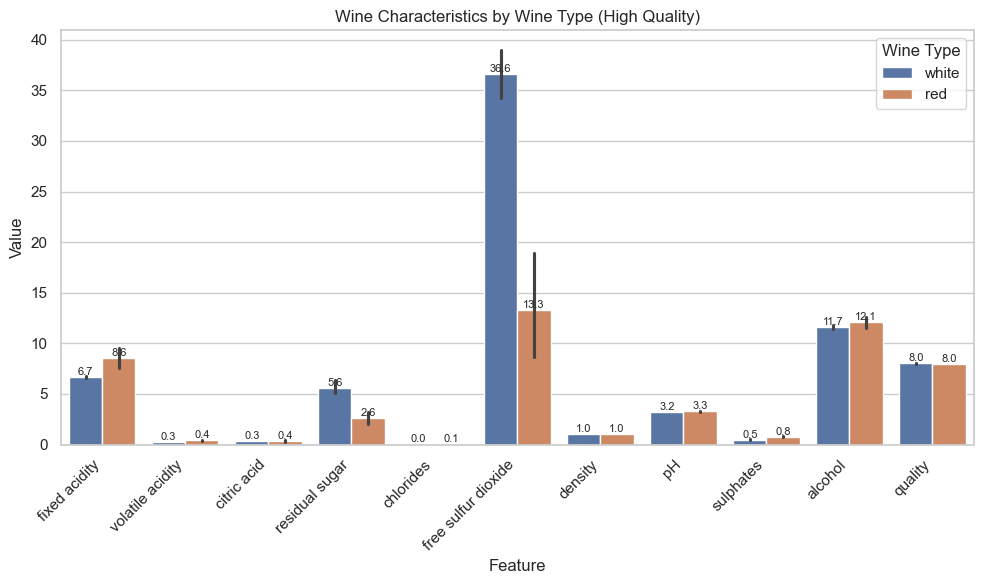

In [ ]:
# Ensure quality_label is treated as a string
combined_wine['quality_label'] = combined_wine['quality_label'].astype(str)

# Filter rows where 'quality_label' == 'high'
filtered_data = combined_wine[combined_wine['quality_label'] == 'high']

# Select numeric columns and retain 'wine_type'
numeric_data = filtered_data.select_dtypes(include=['number'])  # Only numeric columns
if 'wine_type' in filtered_data.columns:
    numeric_data['wine_type'] = filtered_data['wine_type']

# Melt the filtered numeric data
melted_wine = numeric_data.melt(id_vars=['wine_type'], var_name='Feature', value_name='Value')

# Exclude 'total sulfur dioxide' from the melted data
melted_wine = melted_wine[melted_wine['Feature'] != 'total sulfur dioxide']

# Plot the data
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted_wine, x='Feature', y='Value', hue='wine_type')

# Show values on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8)

plt.title('Wine Characteristics by Wine Type (High Quality)')
plt.xlabel('Feature')
plt.ylabel('Value')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.legend(title='Wine Type')
plt.tight_layout()
plt.show()

<Axes: xlabel='density', ylabel='Count'>

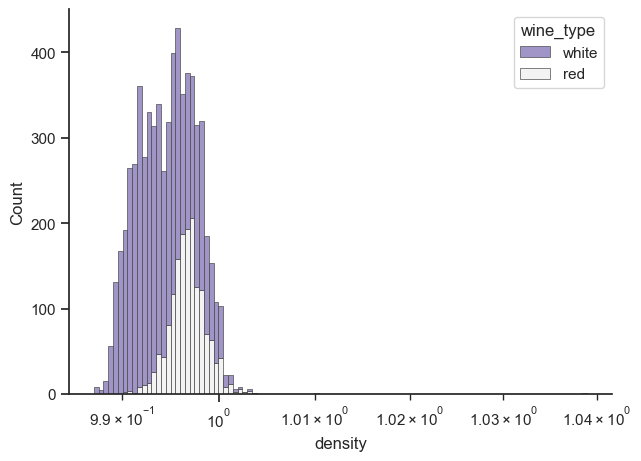

In [ ]:
sns.set_theme(style="ticks")

combined_wine = pd.read_csv("combined_wine.csv") 

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    combined_wine,
    x="density", hue="wine_type",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

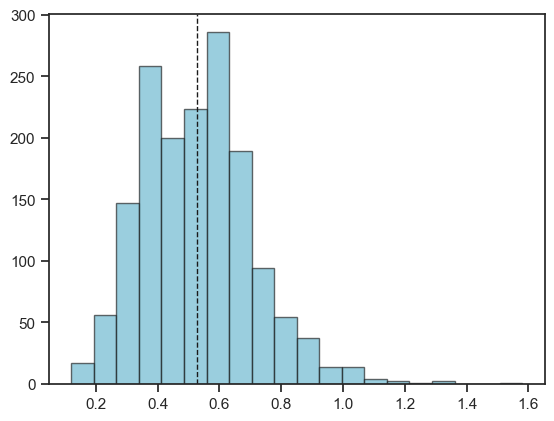

In [148]:
# Create a histogram
plt.hist(redwine['volatile acidity'], bins=20, color='c', edgecolor='k', alpha=0.65)

# Calculate the mean
mean_value = np.mean(redwine['volatile acidity'])

# Draw a vertical line at the mean value
plt.axvline(mean_value, color='k', linestyle='dashed', linewidth=1)

# Show the plot
plt.show()

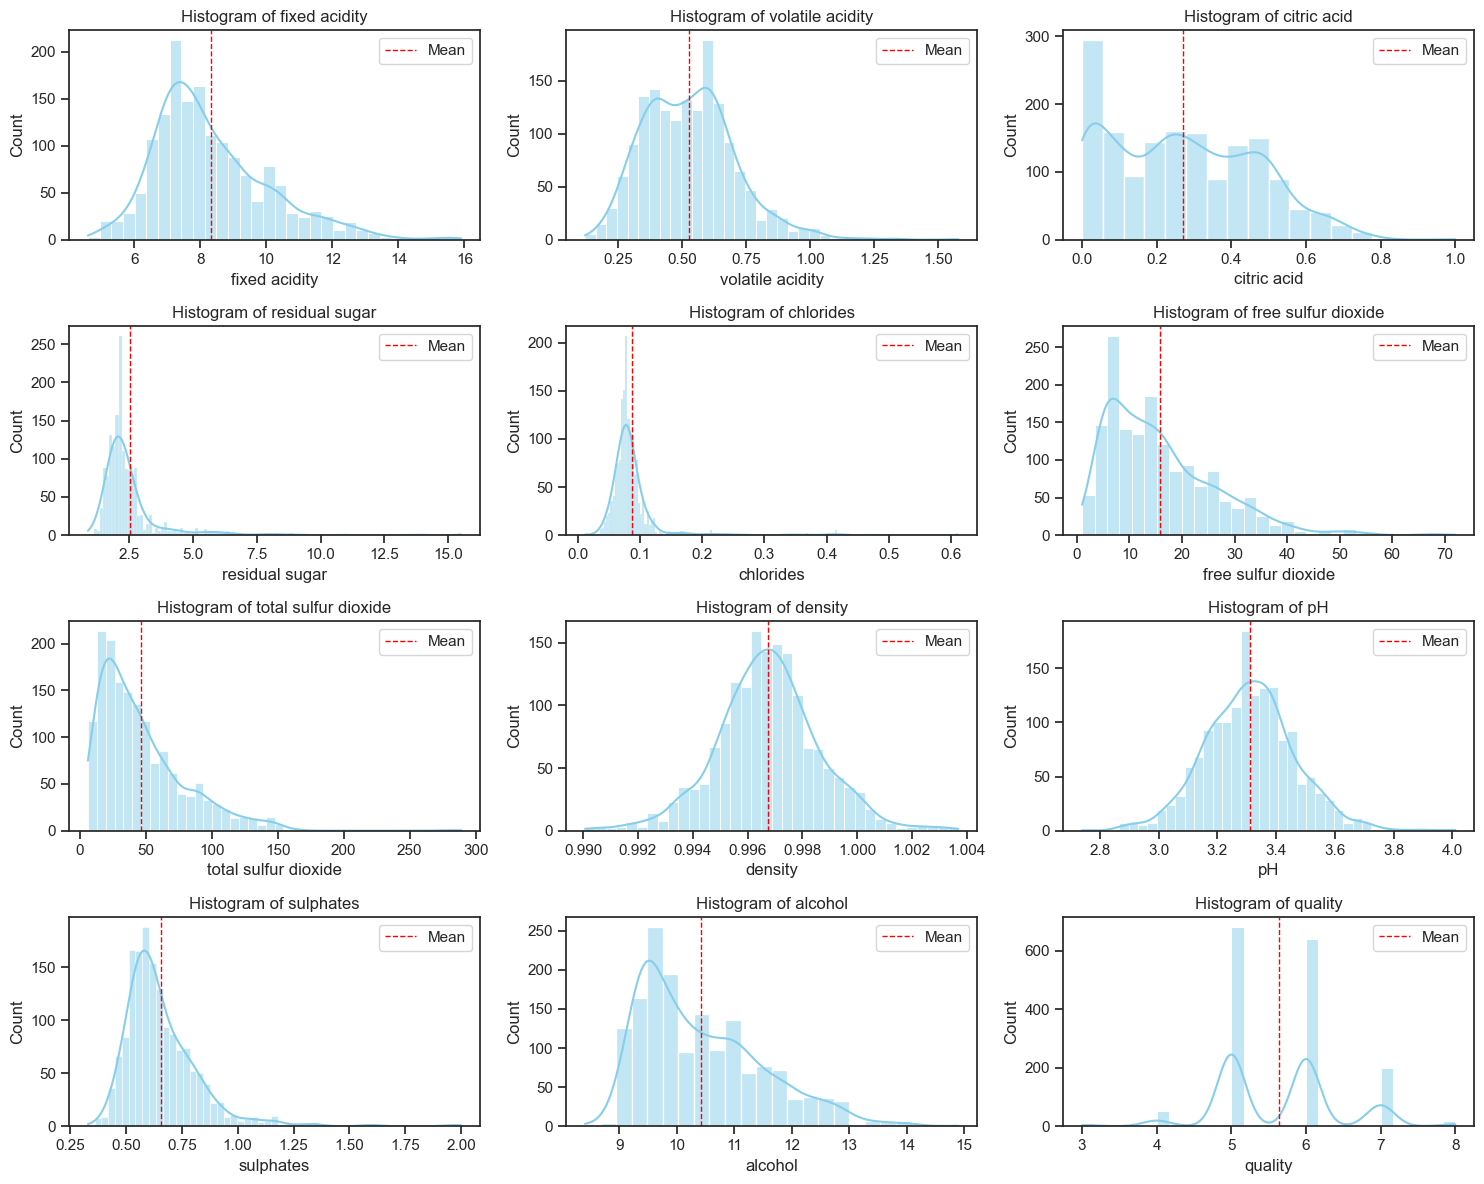

In [149]:
# Plot histograms for all numerical columns
numerical_columns = redwine.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)  # Create grid for subplots
    sns.histplot(redwine[column], kde=True, color='skyblue')
    plt.axvline(redwine[column].mean(), color='red', linestyle='dashed', linewidth=1, label="Mean")
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend()

plt.tight_layout()
plt.show()


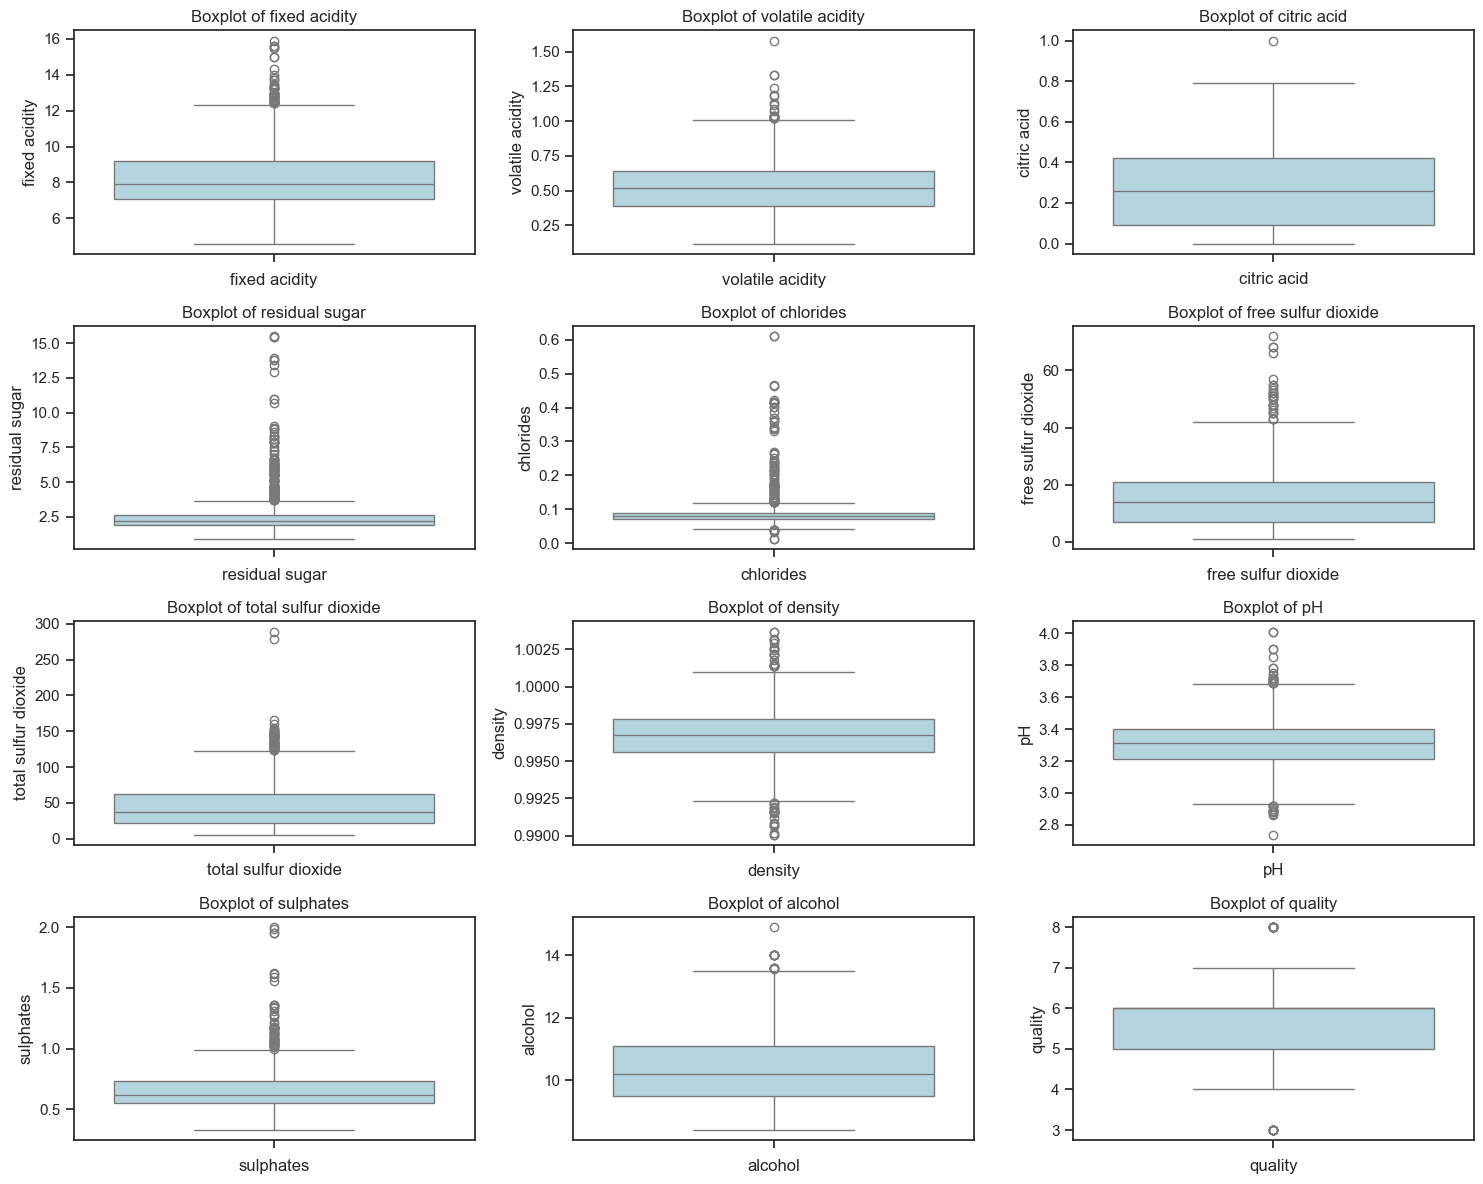

In [ ]:
# Plot boxplots for all numerical columns
numerical_columns = redwine.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)  # Create grid for subplots
    sns.boxplot(y=redwine[column], color='lightblue')
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

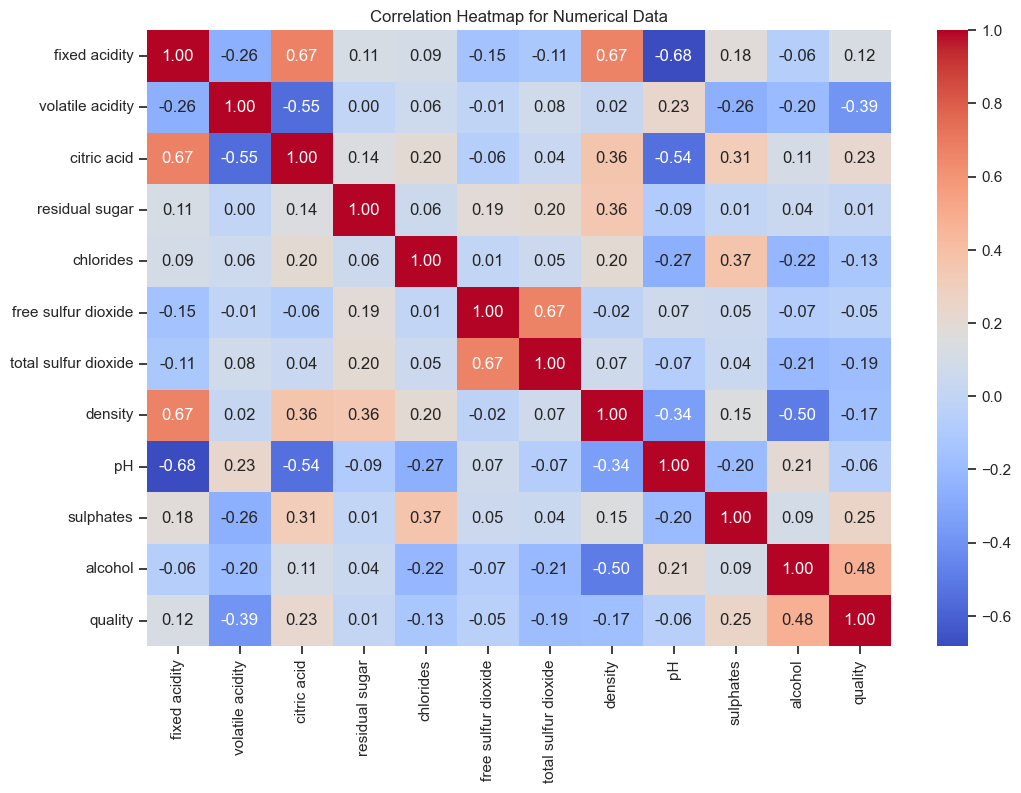

In [151]:
# Select only numerical columns
numerical_data = redwine.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap for Numerical Data")
plt.show()

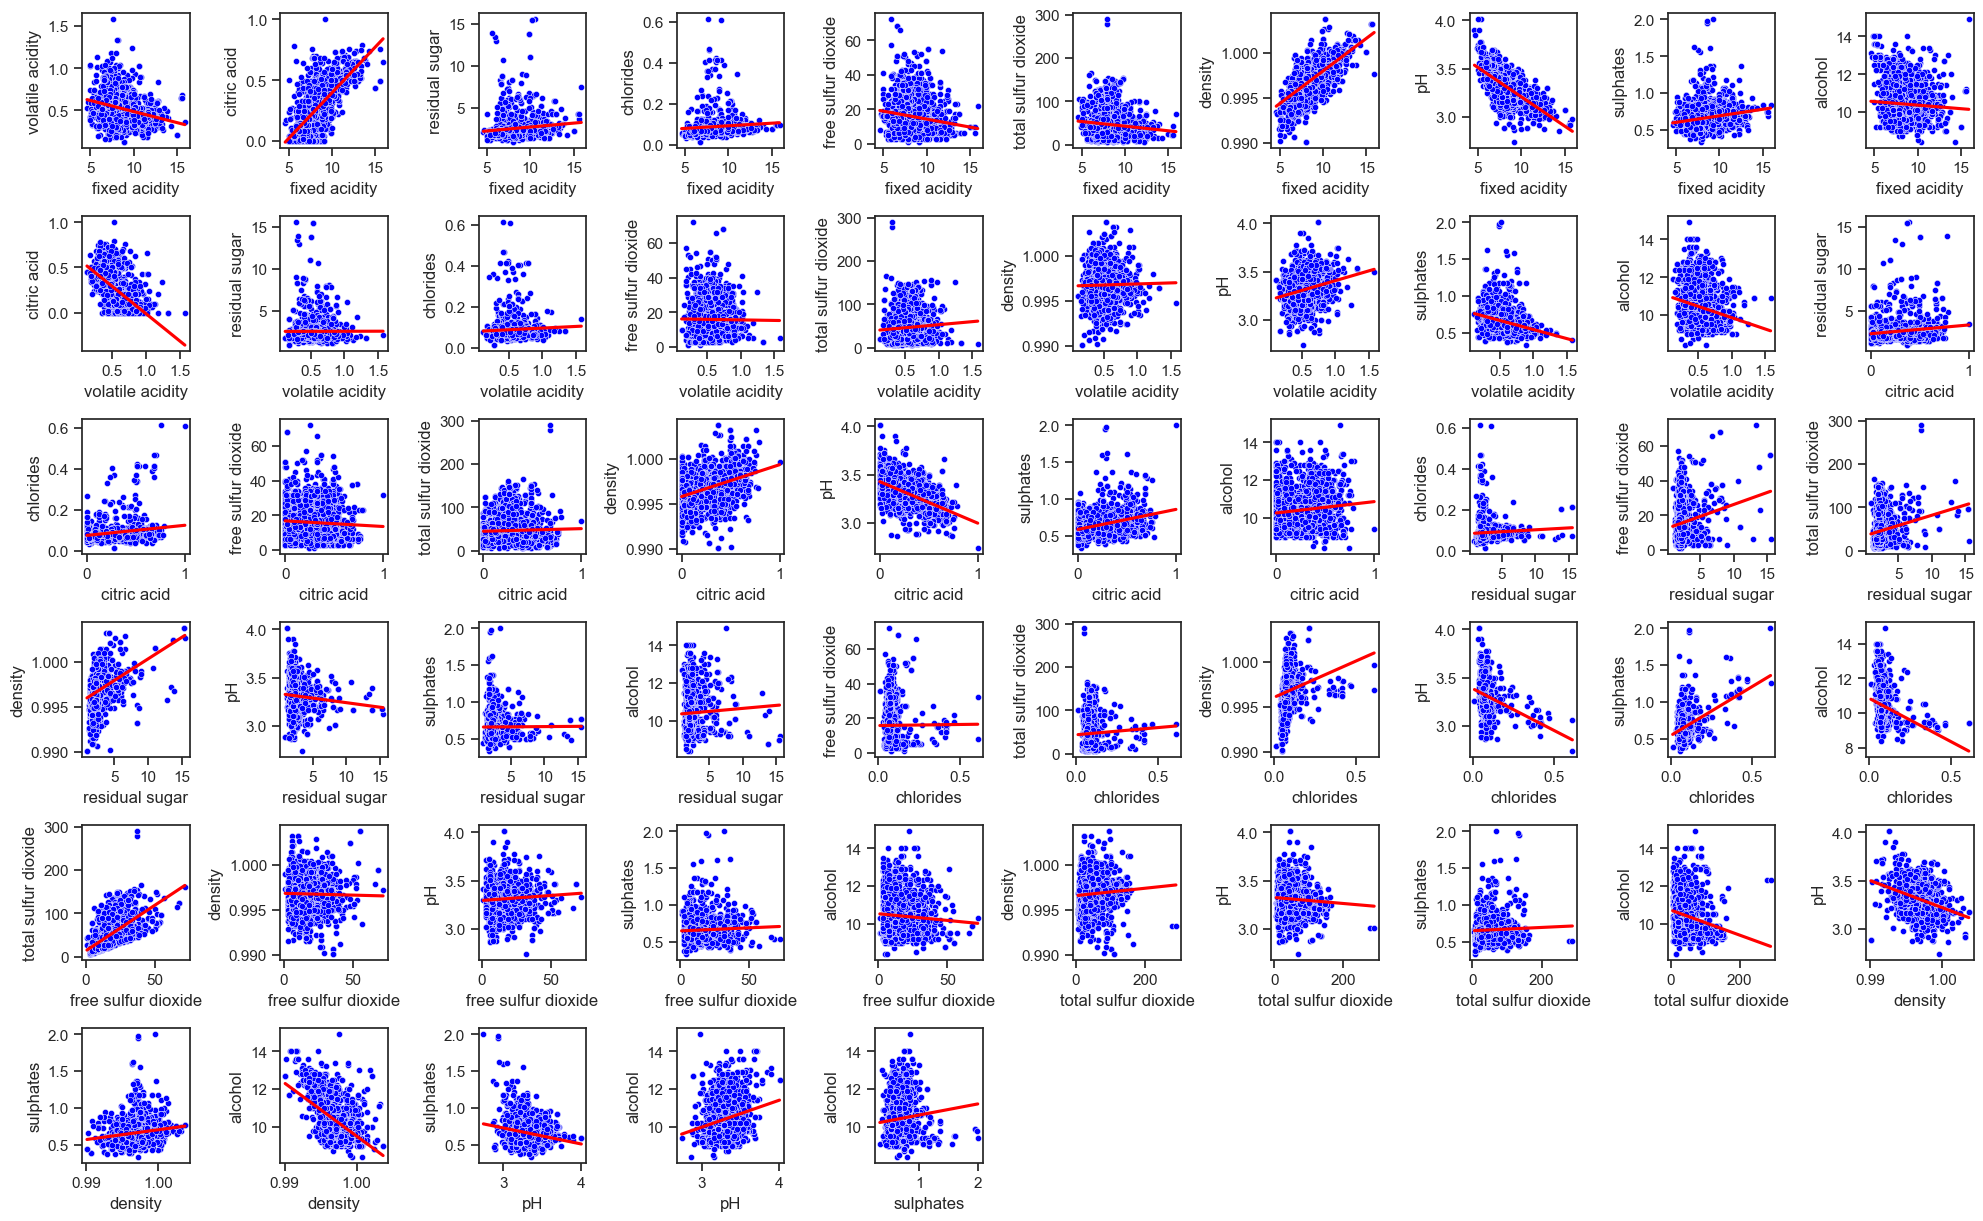

<Figure size 640x480 with 0 Axes>

In [ ]:
# Select only numerical columns and exclude 'quality'
numerical_data = redwine.select_dtypes(include=['float64', 'int64']).drop(columns=['quality'])

# Plot scatter plots with trendlines for all pairs of numerical columns, excluding correlations of 1
columns = numerical_data.columns
num_cols = len(columns)

plt.figure(figsize=(20, 20))
plot_number = 1

for i, col_x in enumerate(columns):
    for j, col_y in enumerate(columns):
        if i < j and numerical_data[col_x].corr(numerical_data[col_y]) != 1:  # Exclude perfect correlations
            plt.subplot(num_cols - 1, num_cols - 1, plot_number)
            sns.scatterplot(x=numerical_data[col_x], y=numerical_data[col_y], s=20, color='blue')
            sns.regplot(x=numerical_data[col_x], y=numerical_data[col_y], scatter=False, color='red', ci=None, line_kws={'linestyle': 'solid'})
            plt.xlabel(col_x)
            plt.ylabel(col_y)
            plot_number += 1

plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Add space between plots
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


In [153]:
# Select only numerical columns and exclude 'quality'
numerical_data = redwine.select_dtypes(include=['float64', 'int64']).drop(columns=['quality'])

# Calculate correlation matrix
corr_matrix = numerical_data.corr()

# Extract positive correlations (>0.5) excluding diagonal (self-correlation)
positive_corr = corr_matrix.where((corr_matrix > 0.5) & (corr_matrix < 1)).stack().reset_index()
positive_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Extract negative correlations (<-0.5)
negative_corr = corr_matrix.where((corr_matrix < -0.5) & (corr_matrix > -1)).stack().reset_index()
negative_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Display the results
print("Positive Correlations:")
print(positive_corr)

print("\nNegative Correlations:")
print(negative_corr)


Positive Correlations:
              Feature 1             Feature 2  Correlation
0         fixed acidity           citric acid     0.671703
1         fixed acidity               density     0.668047
2           citric acid         fixed acidity     0.671703
3   free sulfur dioxide  total sulfur dioxide     0.667666
4  total sulfur dioxide   free sulfur dioxide     0.667666
5               density         fixed acidity     0.668047

Negative Correlations:
          Feature 1         Feature 2  Correlation
0     fixed acidity                pH    -0.682978
1  volatile acidity       citric acid    -0.552496
2       citric acid  volatile acidity    -0.552496
3       citric acid                pH    -0.541904
4                pH     fixed acidity    -0.682978
5                pH       citric acid    -0.541904


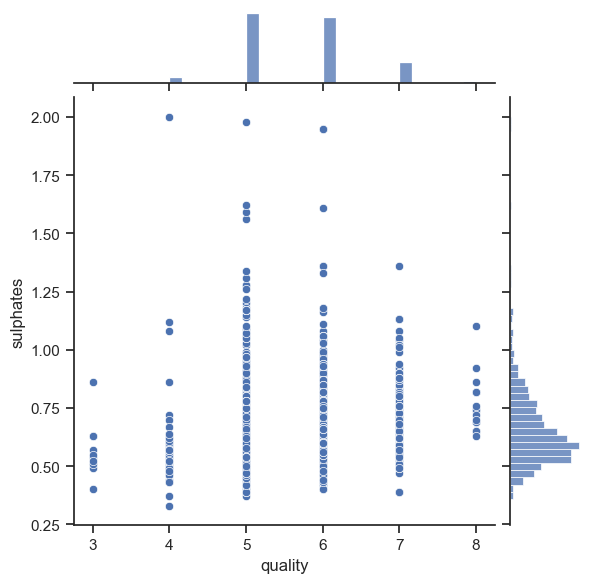

In [157]:
sns.jointplot(data=redwine, x='quality', y='sulphates')

Plotting Quality vs fixed acidity


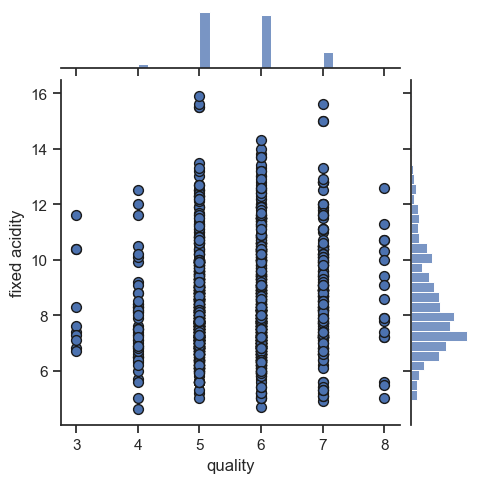

Plotting Quality vs volatile acidity


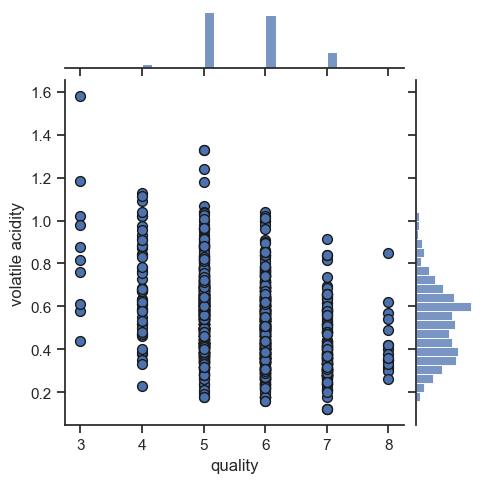

Plotting Quality vs citric acid


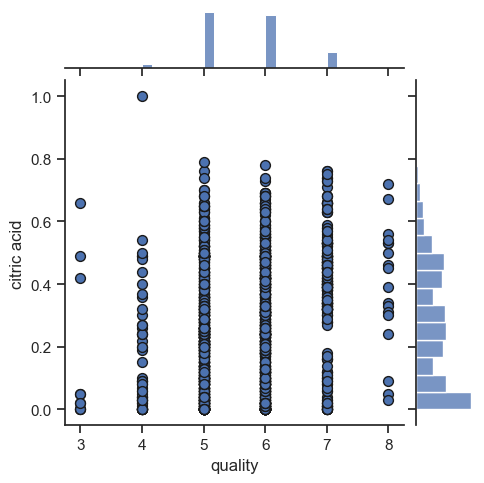

Plotting Quality vs residual sugar


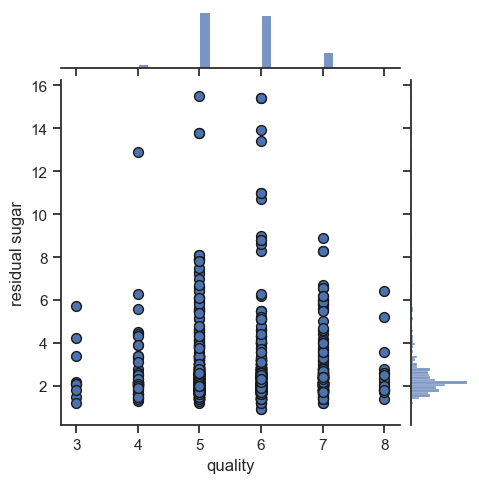

Plotting Quality vs chlorides


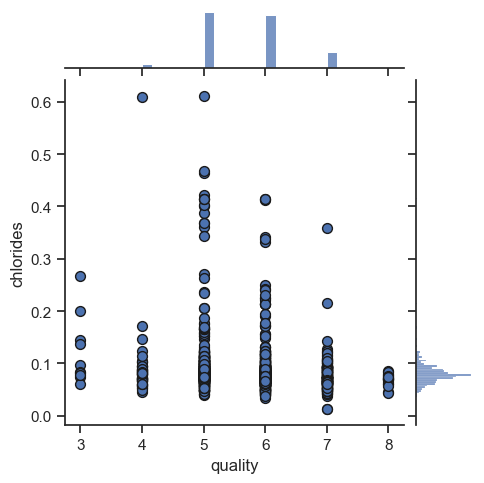

Plotting Quality vs free sulfur dioxide


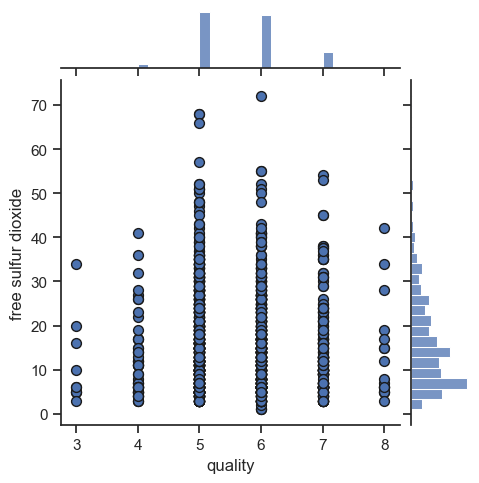

Plotting Quality vs total sulfur dioxide


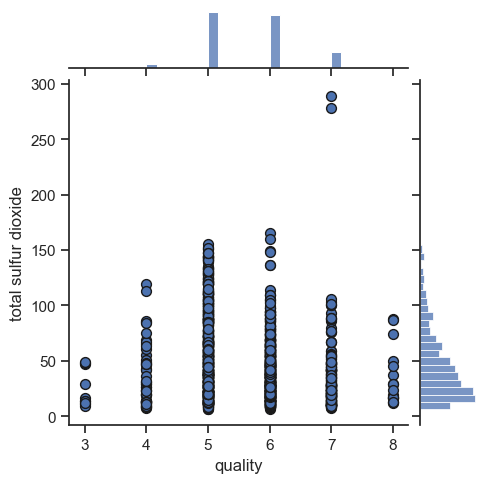

Plotting Quality vs density


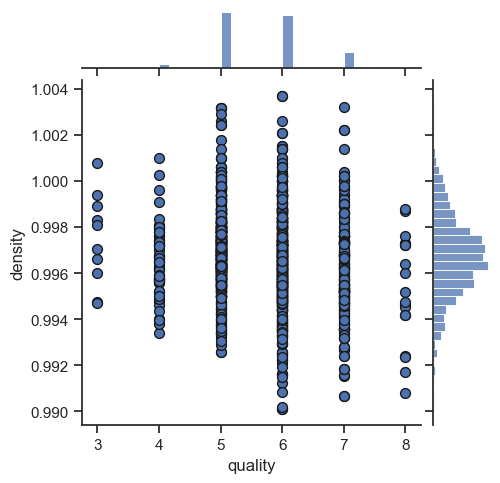

Plotting Quality vs pH


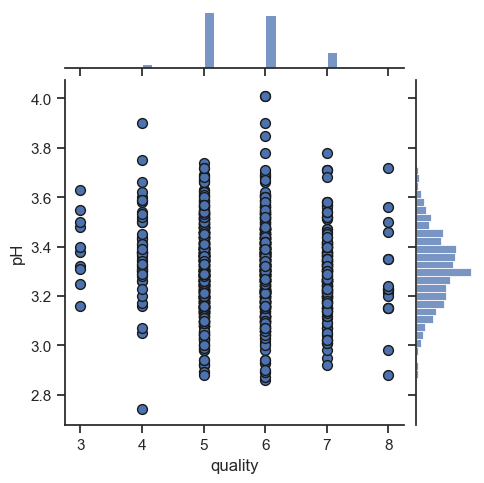

Plotting Quality vs sulphates


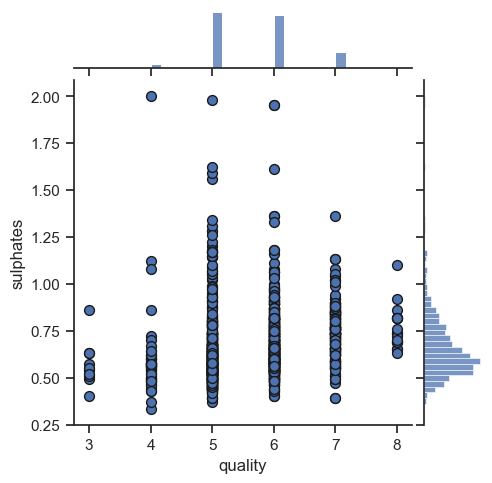

Plotting Quality vs alcohol


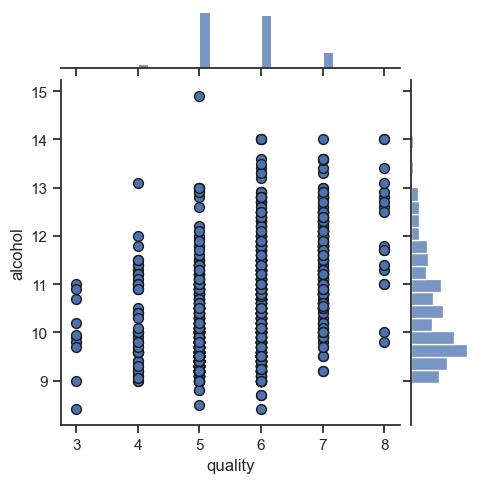

Plotting Quality vs quality_label


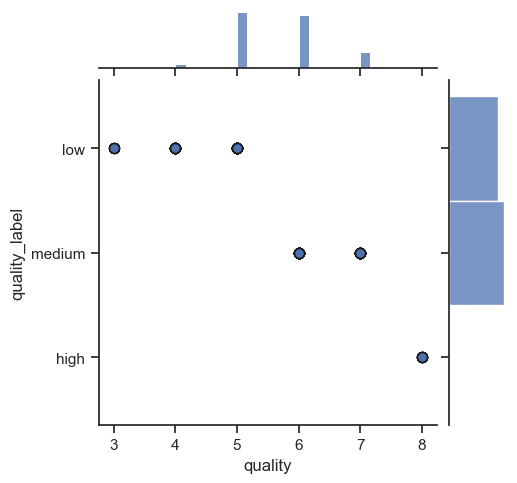

Plotting Quality vs wine_type


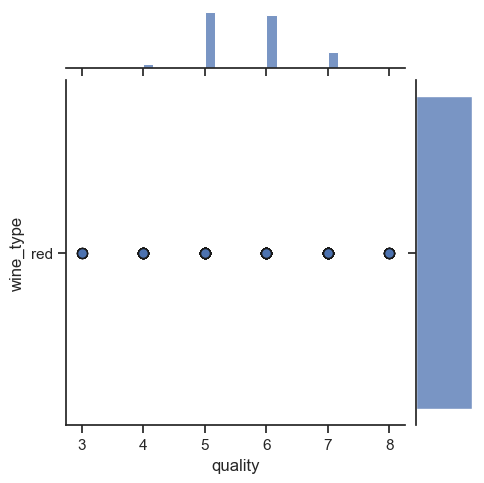

In [165]:
# List of chemical properties (excluding 'quality')
chemicals = [col for col in redwine.columns if col != 'quality']

# Loop through each chemical property and plot jointplots
for chemical in chemicals:
    print(f"Plotting Quality vs {chemical}")  # Indicate which plot is being generated
    sns.jointplot(
        data=redwine,
        x="quality",
        y=chemical,
        kind="scatter",
        joint_kws={'s': 50, 'linewidth': 1, 'edgecolor': 'k'},  # Styling for circles
        height=5  # Control the size of each plot
    )
    plt.show()

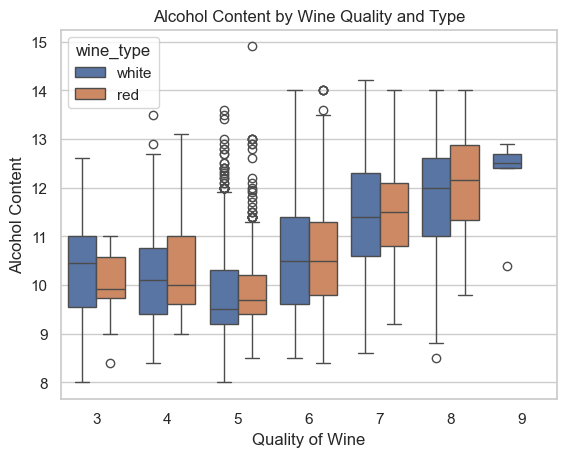

In [ ]:
# Create the boxplot
sns.boxplot(x='quality', y='alcohol', hue='wine_type', data=combined_wine)

# Add labels and title
plt.xlabel("Quality of Wine")  # Label for the x-axis
plt.ylabel("Alcohol Content")  # Label for the y-axis
plt.title("Alcohol Content by Wine Quality and Type")  # Title of the plot

# Show the plot
plt.show()


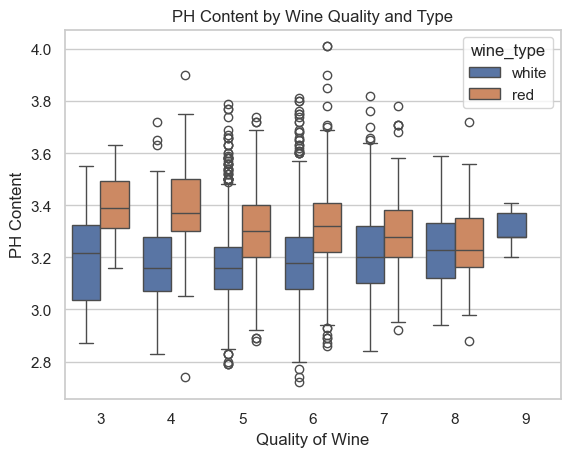

In [73]:
# Create the boxplot
sns.boxplot(x='quality', y='pH', hue='wine_type', data=combined_wine)

# Add labels and title
plt.xlabel("Quality of Wine")  # Label for the x-axis
plt.ylabel("PH Content")  # Label for the y-axis
plt.title("PH Content by Wine Quality and Type")  # Title of the plot

# Show the plot
plt.show()


In [64]:
from scipy.stats import f_oneway

F, p = f_oneway(
    redwine[redwine['quality_label'] == 'low']['alcohol'],
    redwine[redwine['quality_label'] == 'medium']['alcohol'],
    redwine[redwine['quality_label'] == 'high']['alcohol']
)
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print("F-statistic:", F)
print("p-value:", p)


ANOVA test for mean alcohol levels across wine samples with different quality ratings
F-statistic: 205.23448800361507
p-value: 4.776936653588672e-80


In [34]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
